# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [50]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

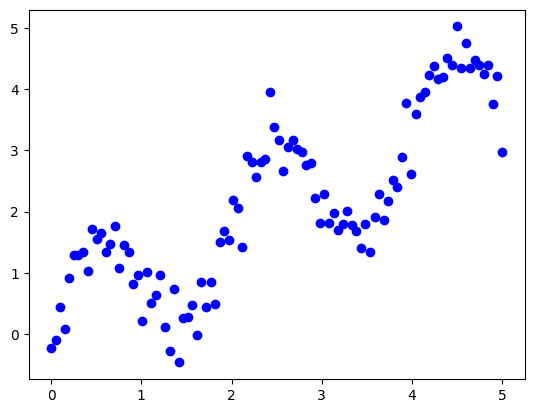

In [51]:
plt.scatter(x,y,c='b')

#### nonlinear

In [52]:
#建模
regr_lin=LinearRegression()

In [53]:
#X轉2D
X_lin = x.reshape(-1,1)
X_lin.shape

(100, 1)

In [54]:
#FIT
regr_lin.fit(X_lin,y)

LinearRegression()

0.6692175433741887

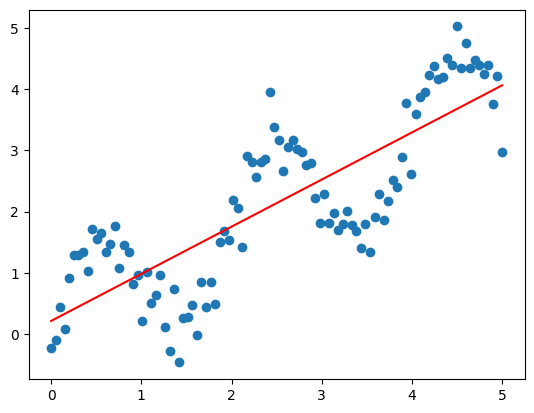

In [74]:
#畫圖、算MSE
Y_lin=regr_lin.predict(X_lin)
plt.scatter(x,y)
plt.plot(x,Y_lin,'r')
mse=sum((Y-y)**2)/len(y)
mse

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [56]:
x.shape

(100,)

In [57]:
#X_ploy
X_poly=np.array([[k,k**2,k**3,k**4,k**5]for k in x])
X_poly.shape

(100, 5)

In [58]:
#建模
regr_poly=LinearRegression()

In [59]:
#FIT
regr_poly.fit(X_poly,y)

LinearRegression()

0.6370088872291317

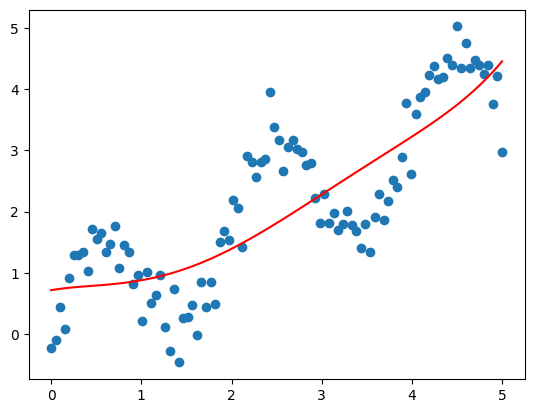

In [60]:
#畫圖、MSE
Y_poly=regr_ploy.predict(X_poly)
plt.scatter(x,y)
plt.plot(x,Y_poly,'r')
mse=sum((Y_poly-y)**2)/len(y)
mse

In [61]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.13152101  1.83362131 -0.84942247  0.17856169 -0.01346158]
interception:  0.9168338767316297


In [62]:
#手刻預測結果
#Y=WX+B
w= regr_poly.coef_
b= regr_poly.intercept_
Y_poly=X_poly.dot(w.T)+b
Y_poly

array([0.91683388, 0.86425521, 0.82039036, 0.78462393, 0.75636732,
       0.73505825, 0.72016018, 0.7111618 , 0.70757651, 0.70894186,
       0.71481905, 0.72479237, 0.73846871, 0.75547698, 0.77546762,
       0.79811204, 0.8231021 , 0.8501496 , 0.8789857 , 0.90936045,
       0.9410422 , 0.97381713, 1.00748864, 1.04187692, 1.07681832,
       1.11216488, 1.1477838 , 1.18355686, 1.21937995, 1.2551625 ,
       1.29082695, 1.32630824, 1.36155327, 1.39652036, 1.43117873,
       1.46550797, 1.49949749, 1.53314603, 1.56646109, 1.59945839,
       1.63216139, 1.66460074, 1.6968137 , 1.72884368, 1.76073967,
       1.79255572, 1.82435041, 1.8561863 , 1.88812942, 1.92024876,
       1.95261567, 1.98530341, 2.01838657, 2.05194053, 2.08604098,
       2.12076335, 2.15618228, 2.1923711 , 2.22940131, 2.26734202,
       2.30625943, 2.34621633, 2.38727153, 2.42947933, 2.47288902,
       2.51754432, 2.56348287, 2.61073567, 2.6593266 , 2.70927183,
       2.76057933, 2.81324832, 2.86726874, 2.92262075, 2.97927

In [63]:
#套函數預測結果
Y_poly=regr_poly.predict(X_poly)
Y_poly

array([0.91683388, 0.86425521, 0.82039036, 0.78462393, 0.75636732,
       0.73505825, 0.72016018, 0.7111618 , 0.70757651, 0.70894186,
       0.71481905, 0.72479237, 0.73846871, 0.75547698, 0.77546762,
       0.79811204, 0.8231021 , 0.8501496 , 0.8789857 , 0.90936045,
       0.9410422 , 0.97381713, 1.00748864, 1.04187692, 1.07681832,
       1.11216488, 1.1477838 , 1.18355686, 1.21937995, 1.2551625 ,
       1.29082695, 1.32630824, 1.36155327, 1.39652036, 1.43117873,
       1.46550797, 1.49949749, 1.53314603, 1.56646109, 1.59945839,
       1.63216139, 1.66460074, 1.6968137 , 1.72884368, 1.76073967,
       1.79255572, 1.82435041, 1.8561863 , 1.88812942, 1.92024876,
       1.95261567, 1.98530341, 2.01838657, 2.05194053, 2.08604098,
       2.12076335, 2.15618228, 2.1923711 , 2.22940131, 2.26734202,
       2.30625943, 2.34621633, 2.38727153, 2.42947933, 2.47288902,
       2.51754432, 2.56348287, 2.61073567, 2.6593266 , 2.70927183,
       2.76057933, 2.81324832, 2.86726874, 2.92262075, 2.97927

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [64]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [65]:
sigma = 0.3

In [66]:
#X_rbf
X_rbf=np.array([[RBF(k,0.5,sigma),RBF(k,1.5,sigma),RBF(k,2.5,sigma),\
                 RBF(k,3.5,sigma),RBF(k,4.5,sigma)]for k in x])

In [67]:
#建模
regr_rbf=LinearRegression()

In [68]:
regr_rbf.fit(X_rbf,y)

LinearRegression()

0.27235545330070443

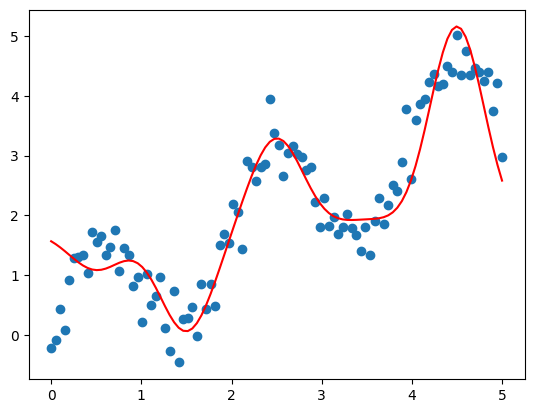

In [71]:
Y_rbf=regr_rbf.predict(X_rbf)
plt.scatter(x,y)
plt.plot(x,Y_rbf,c='r')
mse=sum((Y_rbf-y)**2)/len(y)
mse

In [49]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.87453096 -2.01908424  0.99078333  0.15413921  2.91333858]
interception:  1.8914332803053127


#### Comparison

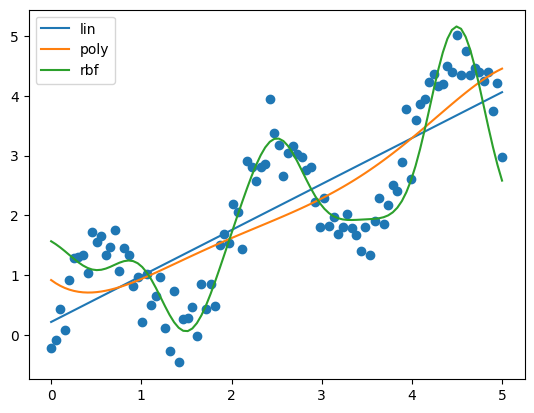

In [78]:
#印三個預測結果
plt.scatter(x,y)
plt.plot(x,Y_lin,label='lin')
plt.plot(x,Y_poly,label='poly')
plt.plot(x,Y_rbf,label='rbf')
plt.legend()

## 請計算模型的MSE

In [79]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6692175433741886


In [80]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.6201988486446202


In [81]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2723554533007046
